In [1]:
#pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb #pip install xgboost
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('/home/anu/Downloads/Boosting dataset/Telco-Customer-Churn_XGboost.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(['customerID'],axis=1,inplace=True)

In [5]:
#df.columns=df.columns.str.replace('','_')
#df.head()

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
#there is some empty strings, so will get error, so set 0

In [11]:
len(df.loc[df['TotalCharges']==' '])

11

In [12]:
df.loc[df['TotalCharges']==' ']
#Total charges column become empty string, will not take null values.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df.loc[(df['TotalCharges']==' '),'TotalCharges']=0


In [14]:
df.loc[df['tenure']==0]
#for all missing values in total charges, tenure is 0, so checking all those tenures

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [15]:
#convert total charges from string /foating point to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])


In [16]:
df.replace(' ','_',regex=True,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One_year', 'Two_year'], dtype=object)

In [18]:
#EDA

Text(0.5, 1.0, 'Gender Distribution')

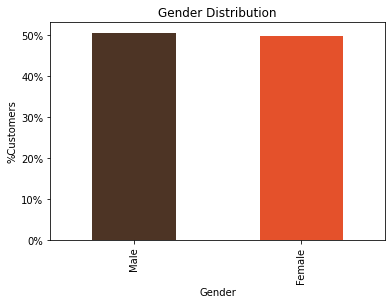

In [19]:
import matplotlib.ticker as mtick
colors=['#4D3425','#E4512B']

ax=(df['gender'].value_counts()*100/len(df)).plot(kind='bar',
                                                 stacked=True,
                                                 color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('%Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

Text(0.5, 1.0, '% of senior citizens')

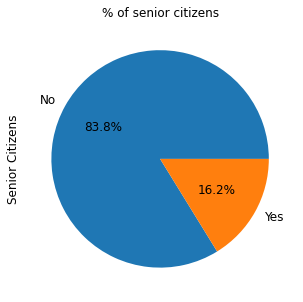

In [20]:
#taking percentange of data in ax
ax=(df['SeniorCitizen'].value_counts()*100/len(df))\
.plot.pie(autopct='%.1f%%',labels=['No','Yes'],figsize=(5,5),fontsize=12)
#.1f denotes 1 digit 
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize=12)
ax.set_title('% of senior citizens',fontsize=12)

/home/anu/yes/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of customers by their tenure')

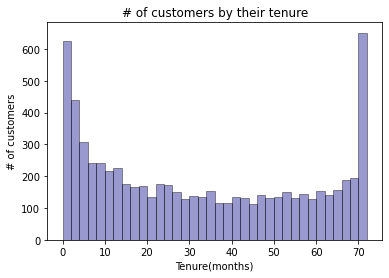

In [21]:
ax=sns.distplot(df['tenure'],hist=True,kde=False,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={"linewidth":4})
#180/5 gives 36 bars
#edge color gives black border to bars
#line width gives width
ax.set_ylabel('# of customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('# of customers by their tenure')

In [22]:
#lot of people used 70 months 

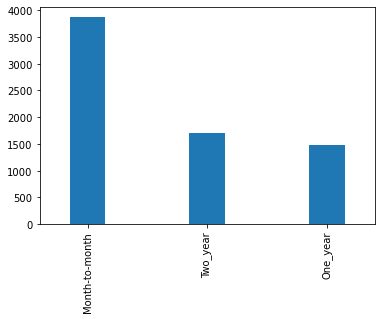

In [23]:
ax=df['Contract'].value_counts().plot(kind='bar',width=0.3)
#3800 contracts are in month to month, 1500 are 2 year etc

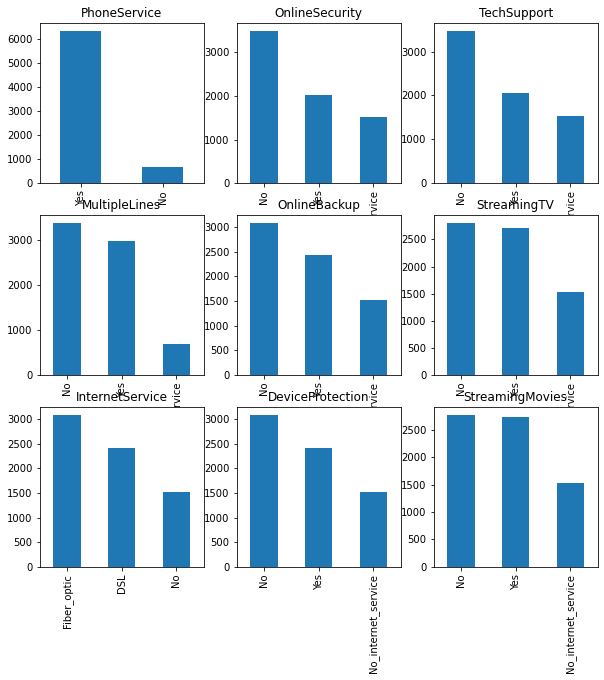

In [24]:
#9 values here in services, going to plot all 9 

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(10,10))#3X3 metrics form
for i,item in enumerate(services):
    if i<3:#first 3 services in column wise
        ax=df[item].value_counts().plot(kind='bar',ax=axes[i,0])
    elif i>=3 and i<6:#next 3
        ax=df[item].value_counts().plot(kind='bar',ax=axes[i-3,1])
    
    elif i<9:
        ax=df[item].value_counts().plot(kind='bar',ax=axes[i-6,2])
    ax.set_title(item)

        #each plot shows service usage (yes or no),
        #if less usage we can reduce its amount so cost also will reduced

Text(0.5, 1.0, 'Churn Rate')

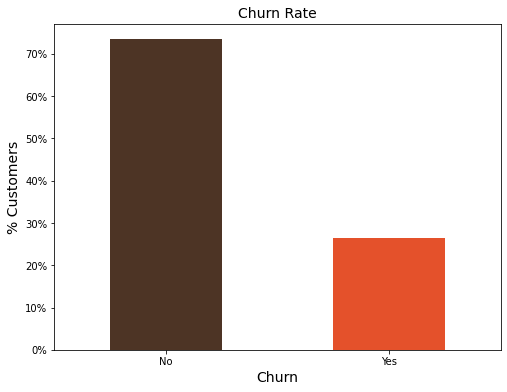

In [25]:
colors=['#4D3425','#E4512B']
ax=(df['Churn'].value_counts()*100.0/len(df)).plot(kind='bar',
                                                  stacked=True,
                                                  rot=0,
                                                  color=colors,
                                                  figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size=14)
ax.set_xlabel('Churn',size=14)
ax.set_title('Churn Rate',size=14)



In [26]:
#almost 72% users stop using the company services.

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One_year        1307   166
Two_year        1647    48


Text(0.5, 1.0, 'Churn by contract type')

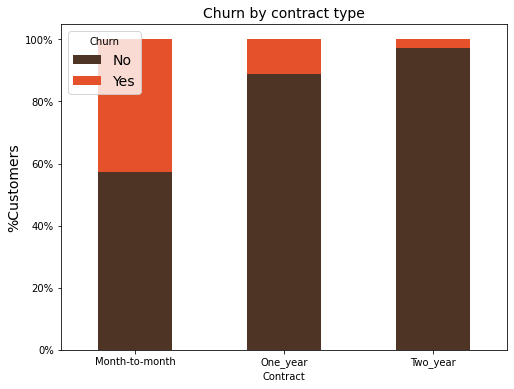

In [27]:
colors=['#4D3425','#E4512B']
contract_churn=df.groupby(['Contract','Churn']).size().unstack()
print(contract_churn)

ax=(contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',
                                                  stacked=True,
                                                  rot=0,
                                                  color=colors,
                                                  figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('%Customers',size=14)
ax.set_title('Churn by contract type',size=14)




In [28]:
#under No- >not churn
#in month to month contract, churn rate is high,people stop using the service

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476


Text(0.5, 1.0, 'Churn by seniority type')

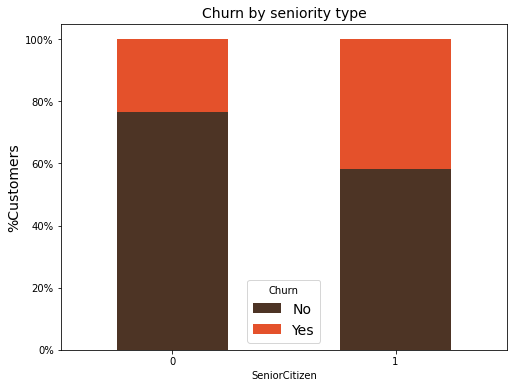

In [29]:
#Seniortiy Level Graph

colors=['#4D3425','#E4512B']
seniority_churn=df.groupby(['SeniorCitizen','Churn']).size().unstack()
print(seniority_churn)

ax=(seniority_churn.T*100.0/seniority_churn.T.sum()).T.plot(kind='bar',
                                                  stacked=True,
                                                  rot=0,
                                                  color=colors,
                                                  figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title='Churn')
ax.set_ylabel('%Customers',size=14)
ax.set_title('Churn by seniority type',size=14)

In [30]:
#orange color shows churn size,
#1 shows senior citizens,almost 60% of them are existing users.

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
for item in df.columns:
    print(item)
    print(df[item].unique())
    #yes, no categorical values converting to binary.
    #so we need to convert it to lower case too

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No_phone_service' 'No' 'Yes']
InternetService
['DSL' 'Fiber_optic' 'No']
OnlineSecurity
['No' 'Yes' 'No_internet_service']
OnlineBackup
['Yes' 'No' 'No_internet_service']
DeviceProtection
['No' 'Yes' 'No_internet_service']
TechSupport
['No' 'Yes' 'No_internet_service']
StreamingTV
['No' 'Yes' 'No_internet_service']
StreamingMovies
['No' 'Yes' 'No_internet_service']
Contract
['Month-to-month' 'One_year' 'Two_year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic_check' 'Mailed_check' 'Bank_transfer_(automatic)'
 'Credit_card_(automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.

In [33]:
#Convert to lower case

for item in df.columns:
    try:
        df[item]=df[item].str.lower()
    except:
        print(item,"couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert
TotalCharges couldn't convert


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [34]:
columns_to_convert=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for item in columns_to_convert:
    df[item].replace(to_replace='yes',value=1,inplace=True)
    df[item].replace(to_replace='no',value=0,inplace=True)
df.head()
#converting values yes to 1 and no to 0,mentioned the columns to be converted

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,1,0,1,0,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic_check,29.85,29.85,0
1,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one_year,0,mailed_check,56.95,1889.50,0
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed_check,53.85,108.15,1
3,male,0,0,0,45,0,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,0,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,0,0,2,1,no,fiber_optic,no,no,no,no,no,no,month-to-month,1,electronic_check,70.70,151.65,1


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

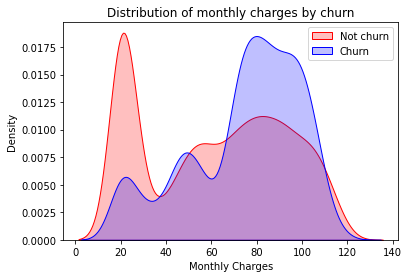

In [35]:
ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']==0)],
              color='Red',shade=True)
ax=sns.kdeplot(df.MonthlyCharges[(df['Churn']==1)],
              ax=ax,color='Blue',shade=True)
ax.legend(["Not churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

#people who didnt churn's monthly charges is betwn ->0 to 40
#people who churn's monthly charges is betwn ->60 to 120

Text(0.5, 1.0, 'Distribution of total charges by churn')

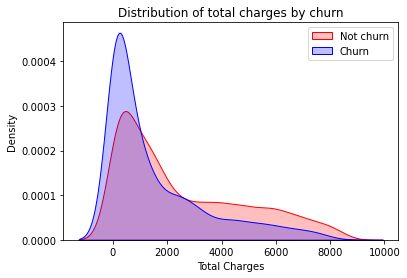

In [36]:
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]==0)],
              color="Red",shade=True)
ax=sns.kdeplot(df.TotalCharges[(df["Churn"]==1)],
              ax=ax,color='Blue',shade=True)
ax.legend(["Not churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

#

In [37]:
for item in df.columns:
    print(item)
    print(df[item].unique())

gender
['female' 'male']
SeniorCitizen
[0 1]
Partner
[1 0]
Dependents
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
[0 1]
MultipleLines
['no_phone_service' 'no' 'yes']
InternetService
['dsl' 'fiber_optic' 'no']
OnlineSecurity
['no' 'yes' 'no_internet_service']
OnlineBackup
['yes' 'no' 'no_internet_service']
DeviceProtection
['no' 'yes' 'no_internet_service']
TechSupport
['no' 'yes' 'no_internet_service']
StreamingTV
['no' 'yes' 'no_internet_service']
StreamingMovies
['no' 'yes' 'no_internet_service']
Contract
['month-to-month' 'one_year' 'two_year']
PaperlessBilling
[1 0]
PaymentMethod
['electronic_check' 'mailed_check' 'bank_transfer_(automatic)'
 'credit_card_(automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.

In [38]:
#checking the count of churners and nonchurners

churners_number=len(df[df['Churn']==1])
churners_number


1869

In [39]:
nonchurners_number=len(df[df['Churn']==0])
nonchurners_number

5174

In [40]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000


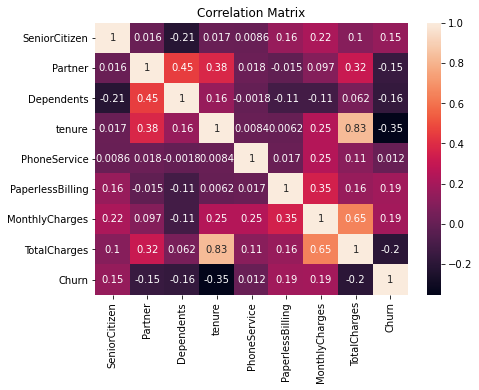

In [41]:
plt.figure(figsize=(7,5))
c=df.corr()
sns.heatmap(c,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [42]:
ml_dummies=pd.get_dummies(df)
ml_dummies.fillna(value=0,inplace=True)
ml_dummies.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

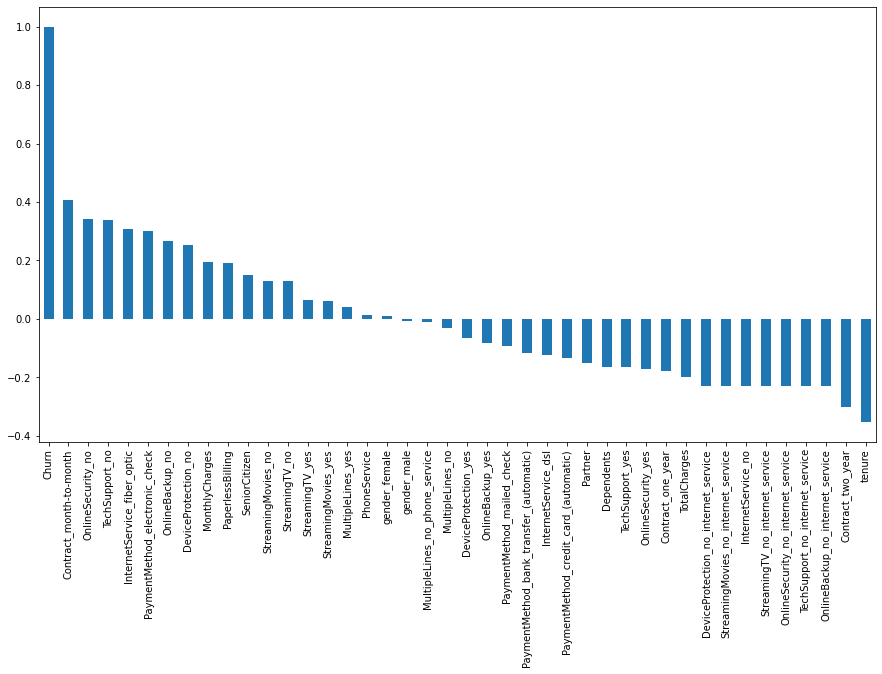

In [43]:
plt.figure(figsize=(15,8))
ml_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind='bar')

#it's like number line
#positive correlated values are marked above 0, -ve correlated are below 0

In [44]:
x=ml_dummies.drop('Churn',axis=1).copy()
x.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_female,gender_male,...,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check
0,0,1,0,1,0,1,29.85,29.85,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0


In [45]:
y=ml_dummies['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [46]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [47]:
df.shape

(7043, 20)

In [48]:
sum(y)/len(y)

#y values added, ie, only 1's are added(count of people who churned)

0.2653698707936959

In [49]:
#73%

# stratify-> it will handle the imbalancing

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,stratify=y)



In [51]:
sum(ytrain)/len(ytrain)

0.2654297614539947

In [52]:
sum(ytest)/len(ytest)

0.26519023282226006

In [53]:
## building a preliminary model
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',missing=1,seed=42)
clf_xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,\
            eval_metric='aucpr',eval_set=[(xtest,ytest)])

#iterate till 10  trees,after 10 trees if there is no increase in validation accuracy,then it will stop

[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64461
[4]	validation_0-aucpr:0.64114
[5]	validation_0-aucpr:0.64016
[6]	validation_0-aucpr:0.64620


/home/anu/yes/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[7]	validation_0-aucpr:0.64003
[8]	validation_0-aucpr:0.63913
[9]	validation_0-aucpr:0.64153
[10]	validation_0-aucpr:0.64172
[11]	validation_0-aucpr:0.63950
[12]	validation_0-aucpr:0.63687
[13]	validation_0-aucpr:0.63473
[14]	validation_0-aucpr:0.63442
[15]	validation_0-aucpr:0.63634
[16]	validation_0-aucpr:0.63597


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

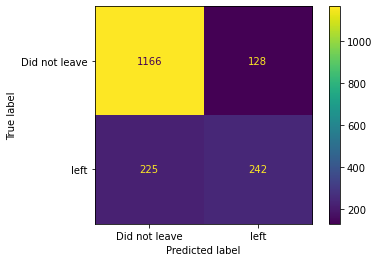

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_xgb,xtest,ytest,values_format='d',\
                     display_labels=['Did not leave','left'])

In [55]:
#1155+139
1155/1294

0.89258114374034

In [56]:
#misclassification
242+225

467

In [57]:
242/467

0.5182012847965739

In [58]:
#Hyper parameter tuning
#part-1

#param_grid={
 #   'max_depth':[3,4,5],#3,4,5 are n.o of branches in each iter
  #  'learning_rate':[0.1,0.01,0.05],
   # 'gamma':[0,0.25,1.0],
    #'reg_lambda':[0,1.0,10.0],
    #'scale_pos_weight':[1,3,5]
#}


#optimal_params=GridSearchCV(
 #   estimator=xgb.XGBClassifier(objective='binary:logistic',
  #                         seed=42,
   #                        subsample=0.9,
    #                       colsample_bytree=0.5),
    #param_grid=param_grid,
    #scoring='roc_auc',
    #verbose=2,
    #n_jobs=10,
    #cv=3
    
#)


#there is some imbalancing
#"scale_pos_weight" a parameter
#it help us to maintain the balancing by applying some weights to the overall data
#comment above and do below


#{'gamma':0,'learning_rate':0.05,
#'max_depth':4,'reg_lambda':10.0,'scale_pos_weight':1}

#part-2
param_grid={
    'max_depth':[4],
    'learning_rate':[0.05,0.07,0.09],
    'gamma':[0,0.1,0.25],
    'reg_lambda':[10.0,20,100],
    'scale_pos_weight':[1,2]
    
}
#{'gamma':0.25,'learning_rate':0.07,max_depth':4,
 #'reg_lambda':10.0,'scale_pos_weight':1}
    
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=2,
    n_jobs=10,
    cv=3
    
)

optimal_params.fit(xtrain,ytrain,early_stopping_rounds=10,\
                  eval_metric='auc',eval_set=[(xtest,ytest)],\
                  verbose=1)
print(optimal_params.best_params_)
#

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[0]	validation_0-auc:0.80790
[1]	validation_0-auc:0.82546
[2]	validation_0-auc:0.82576
[3]	validation_0-auc:0.82991
[4]	validation_0-auc:0.82646
[5]	validation_0-auc:0.82746
[6]	validation_0-auc:0.83042
[7]	validation_0-auc:0.83377
[8]	validation_0-auc:0.83596
[9]	validation_0-auc:0.83778
[10]	validation_0-auc:0.83776
[11]	validation_0-auc:0.83758


/home/anu/yes/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-auc:0.83791
[13]	validation_0-auc:0.83875
[14]	validation_0-auc:0.83942
[15]	validation_0-auc:0.83949
[16]	validation_0-auc:0.83934
[17]	validation_0-auc:0.83980
[18]	validation_0-auc:0.83998
[19]	validation_0-auc:0.84017
[20]	validation_0-auc:0.83981
[21]	validation_0-auc:0.84110
[22]	validation_0-auc:0.84128
[23]	validation_0-auc:0.84169
[24]	validation_0-auc:0.84260
[25]	validation_0-auc:0.84270
[26]	validation_0-auc:0.84207
[27]	validation_0-auc:0.84280
[28]	validation_0-auc:0.84323
[29]	validation_0-auc:0.84384
[30]	validation_0-auc:0.84377
[31]	validation_0-auc:0.84379
[32]	validation_0-auc:0.84422
[33]	validation_0-auc:0.84451
[34]	validation_0-auc:0.84478
[35]	validation_0-auc:0.84514
[36]	validation_0-auc:0.84523
[37]	validation_0-auc:0.84574
[38]	validation_0-auc:0.84604
[39]	validation_0-auc:0.84637
[40]	validation_0-auc:0.84681
[41]	validation_0-auc:0.84668
[42]	validation_0-auc:0.84710
[43]	validation_0-auc:0.84714
[44]	validation_0-auc:0.84752
[45]	valid

In [59]:
#final model

clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learning_rate=0.07,
                            max_depth=4,
                            reg_lambda=20,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            min_child_weight=0)

model=clf_xgb.fit(xtrain,ytrain,verbose=True,early_stopping_rounds=10,
                 eval_metric='aucpr',eval_set=[(xtest,ytest)])
model

#after 10 rounds , we get 63% accuracy

[0]	validation_0-aucpr:0.58983
[1]	validation_0-aucpr:0.59732
[2]	validation_0-aucpr:0.60857
[3]	validation_0-aucpr:0.61278
[4]	validation_0-aucpr:0.61511
[5]	validation_0-aucpr:0.61570
[6]	validation_0-aucpr:0.61820
[7]	validation_0-aucpr:0.62272
[8]	validation_0-aucpr:0.62420
[9]	validation_0-aucpr:0.62330
[10]	validation_0-aucpr:0.62165
[11]	validation_0-aucpr:0.62143
[12]	validation_0-aucpr:0.62108
[13]	validation_0-aucpr:0.62691
[14]	validation_0-aucpr:0.62886
[15]	validation_0-aucpr:0.62779
[16]	validation_0-aucpr:0.62801
[17]	validation_0-aucpr:0.61972
[18]	validation_0-aucpr:0.61974
[19]	validation_0-aucpr:0.62014
[20]	validation_0-aucpr:0.61974
[21]	validation_0-aucpr:0.62532
[22]	validation_0-aucpr:0.62566
[23]	validation_0-aucpr:0.63176
[24]	validation_0-aucpr:0.63301
[25]	validation_0-aucpr:0.63777
[26]	validation_0-aucpr:0.63698
[27]	validation_0-aucpr:0.63855
[28]	validation_0-aucpr:0.63850
[29]	validation_0-aucpr:0.63586
[30]	validation_0-aucpr:0.63979
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=4,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=20, scale_pos_weight=3, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
#check the output 

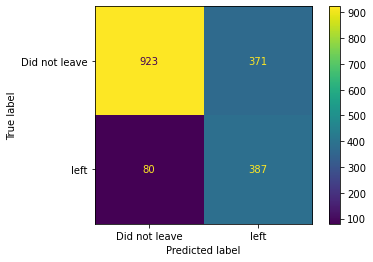

In [61]:
plot_confusion_matrix(model,xtest,ytest,values_format='d',
                     display_labels=['Did not leave','left'])

In [62]:
923+371

1294

In [63]:
923/1294

0.7132921174652241

In [64]:
387/467

0.828693790149893

# Build the tree now

In [65]:
bst=clf_xgb.get_booster()
for importance_type in ('weight','gain','cover','total_gain','total_cover'):
    print('%s:'%importance_type,bst.get_score(importance_type=importance_type))

node_params={
    'shape':'box',
    'style':'filled,rounded',
    'fillcolor':'#78cbe'
}

leaf_params={
    'shape':'box',
    'style':'filled',
    'fillcolor':'#e48038'
}




weight: {'Contract_month-to-month': 22, 'MonthlyCharges': 93, 'OnlineSecurity_no': 28, 'Contract_two_year': 18, 'TotalCharges': 145, 'InternetService_fiber_optic': 30, 'tenure': 77, 'TechSupport_no': 26, 'InternetService_dsl': 16, 'Contract_one_year': 17, 'PhoneService': 4, 'PaymentMethod_electronic_check': 35, 'OnlineSecurity_yes': 13, 'StreamingMovies_yes': 24, 'SeniorCitizen': 21, 'OnlineBackup_no': 23, 'TechSupport_yes': 10, 'StreamingTV_no': 5, 'PaymentMethod_credit_card_(automatic)': 8, 'DeviceProtection_yes': 4, 'PaperlessBilling': 29, 'OnlineSecurity_no_internet_service': 3, 'PaymentMethod_mailed_check': 8, 'StreamingMovies_no': 9, 'TechSupport_no_internet_service': 2, 'StreamingTV_yes': 9, 'MultipleLines_no_phone_service': 7, 'OnlineBackup_yes': 9, 'Partner': 11, 'InternetService_no': 7, 'Dependents': 9, 'DeviceProtection_no': 9, 'MultipleLines_yes': 14, 'gender_male': 2, 'gender_female': 11, 'PaymentMethod_bank_transfer_(automatic)': 10, 'MultipleLines_no': 10, 'DeviceProtect

In [78]:
#passing condition of node & leaf

#xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
 #                        condition_node_params=node_params,
  #                       leaf_node_params=leaf_params);


#to save it accordingly

#graph_data=xgb.to_graphviz(clf_xgb,num_trees=0,size="10,10",
 #              condition_node_params=node_params,
  #             leaf_node_params=leaf_params)
#graph_data.view(filename='xgboost_tree_customer_churn')

In [ ]:
# pip install graphviz

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

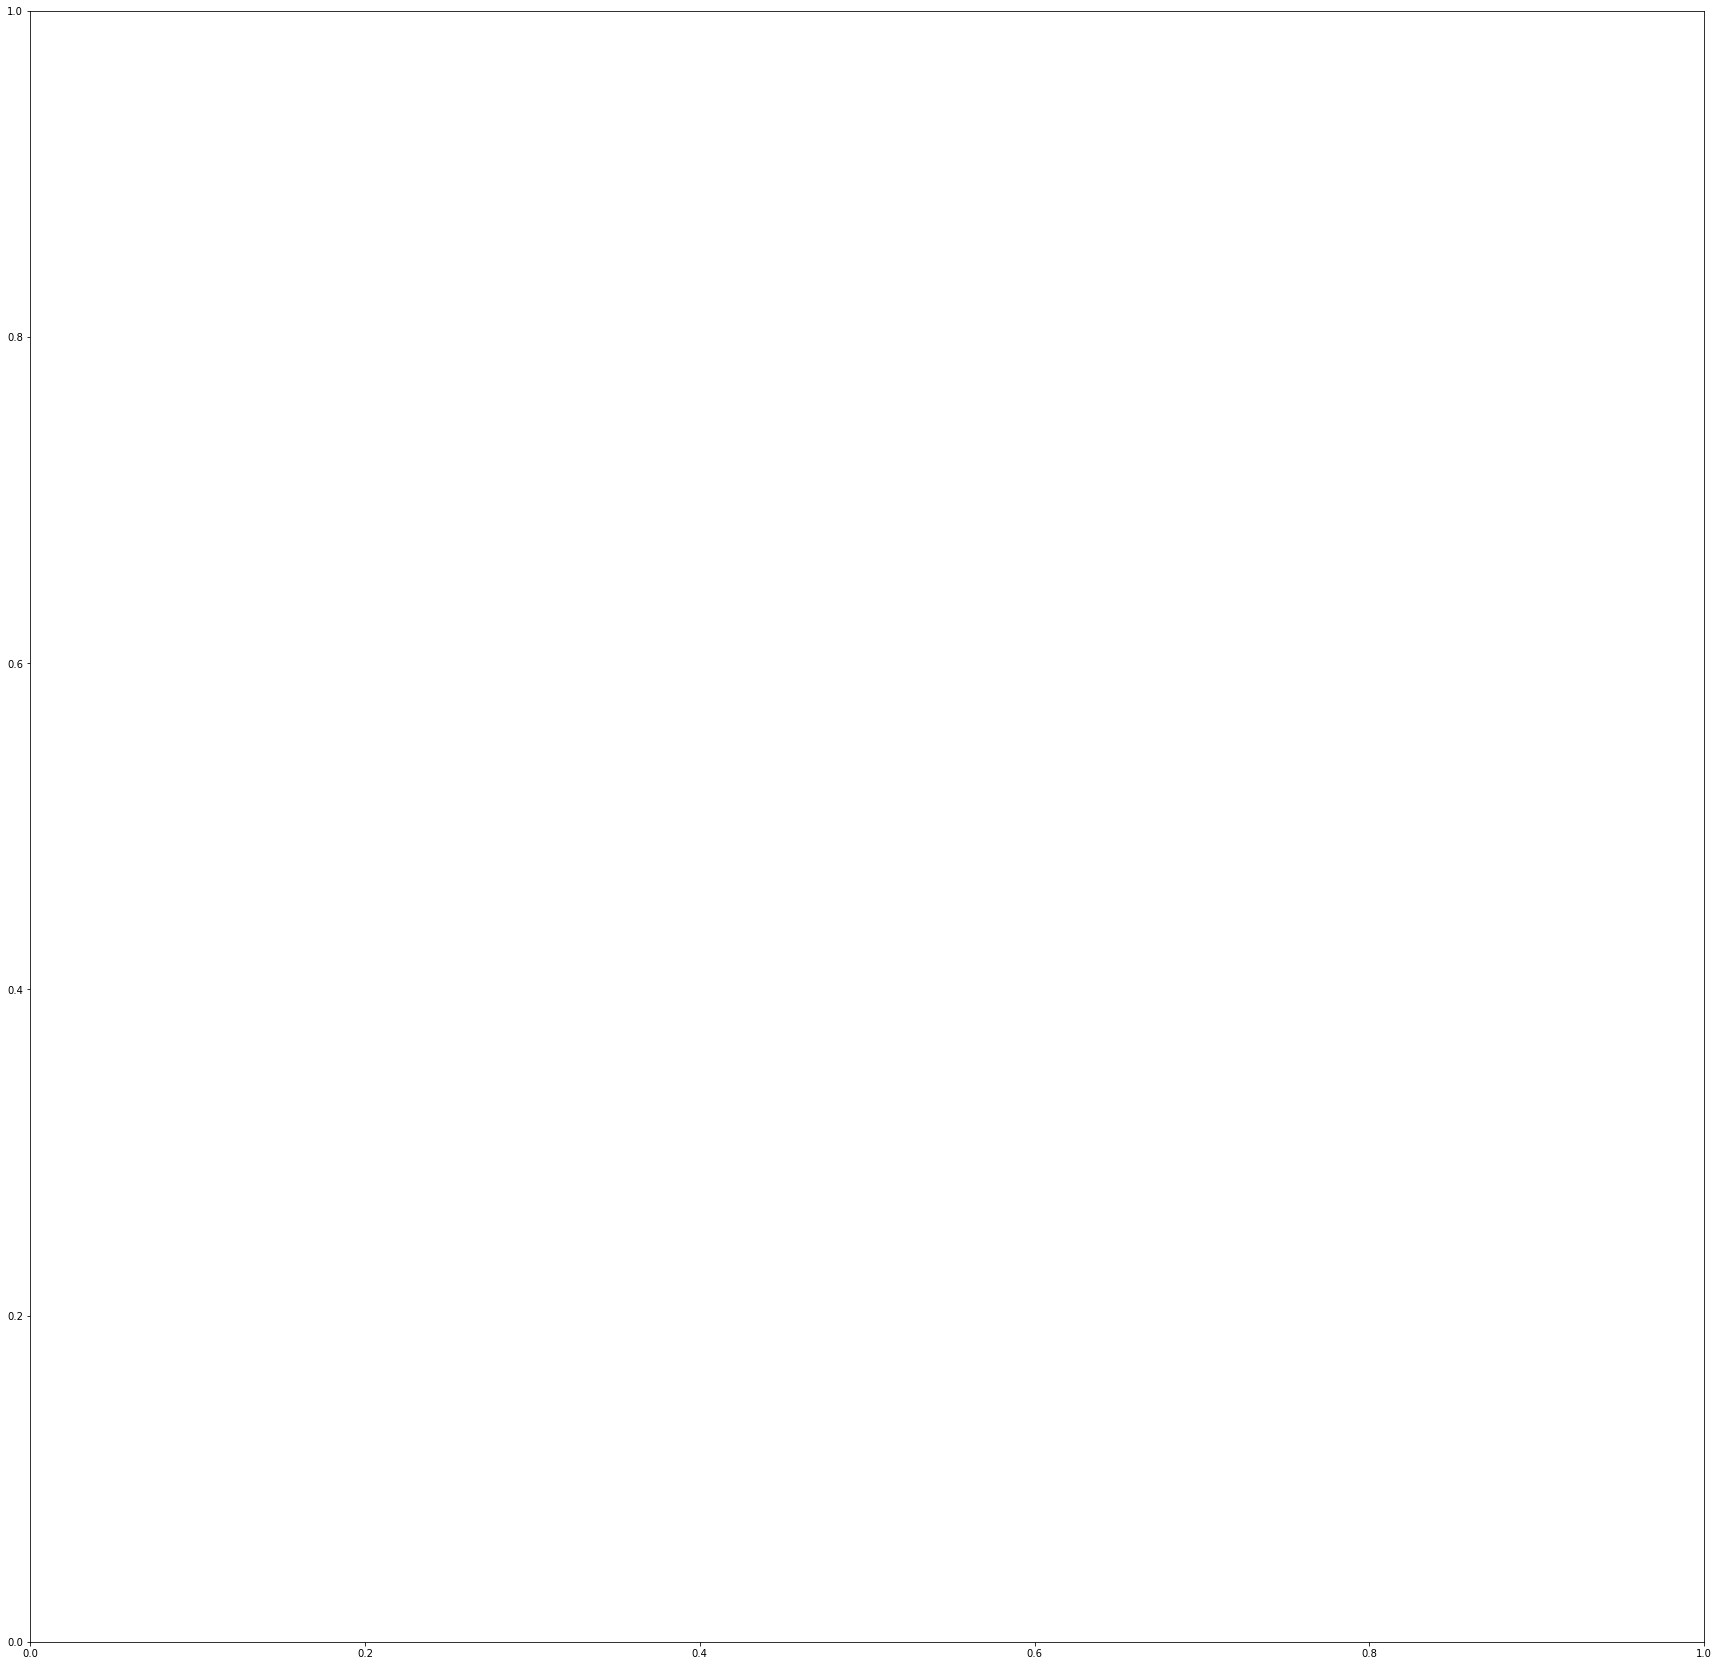

In [93]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(clf_xgb, num_trees=4, ax=ax)
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'tree_'

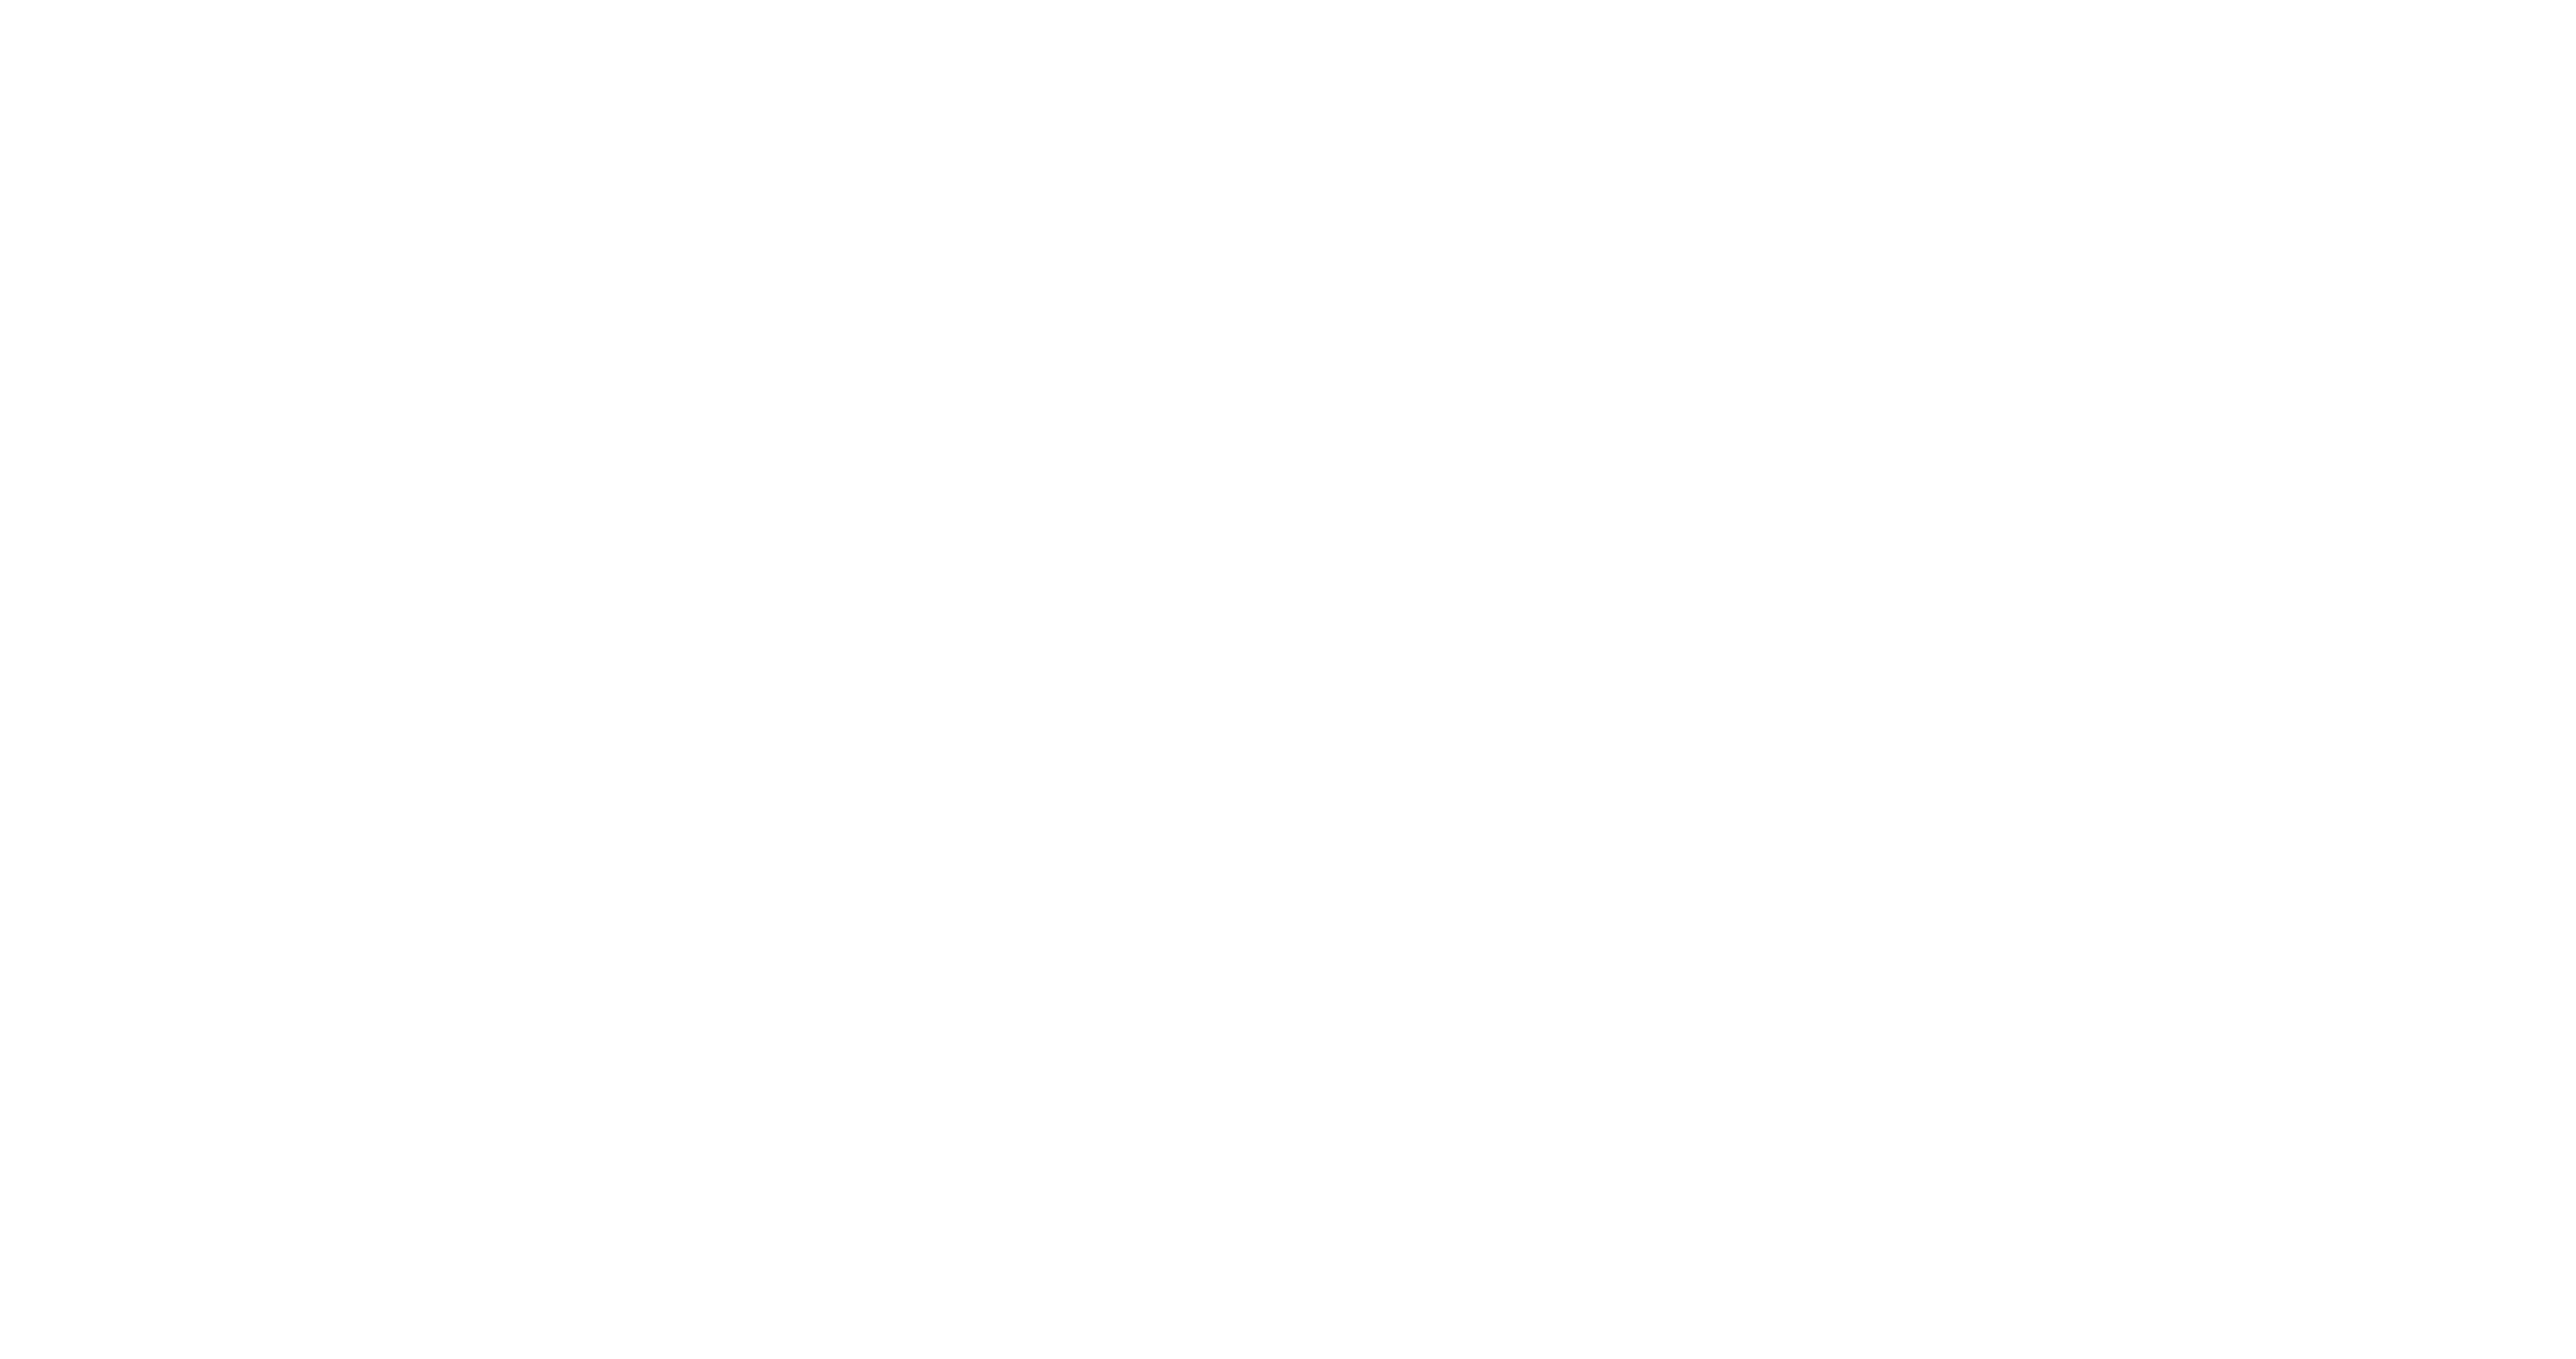

In [92]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8),dpi=300)
a=tree.plot_tree(clf_xgb)#also try max_depth=3 or None
fig.savefig('tree28.png') 